In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io, scipy.ndimage
import seaborn as sns
import pandas as pd

### Non-neutral cell population dynamics ($s=3$)

In [2]:
# load data from files
DIR = '../exps/'

data_a = np.loadtxt(DIR+'Summary_3_1_0_a.txt', dtype=int)
data_b = np.loadtxt(DIR+'Summary_3_1_0_b.txt', dtype=int)

# create pandas dataframe... this part is a hack that might get removed
# if I already save output from the C++ code in the correct format

## create vector that contains the simulation run index
simulation_run = np.repeat(np.arange(0,data_a.shape[0],1),
          data_a.shape[1])

## create vector containing cell number
cell_index = np.tile(np.arange(0, data_a.shape[1],1), data_a.shape[0])

## create vector containing type name
types = np.repeat(np.array(['a', 'b']), data_a.flatten().size)

## create dataframe
data = pd.DataFrame({"cell index": np.concatenate((cell_index, cell_index)),
                    "simulation run": np.concatenate((simulation_run, simulation_run)),
                     "copy number": np.concatenate((data_a.flatten(), data_b.flatten())),
                     "ecDNA type": types})
data

,cell index,simulation run,copy number,ecDNA type
0,0,0,3,a
1,1,0,3,a
2,2,0,2,a
3,3,0,6,a
4,4,0,6,a
...,...,...,...,...
3999995,99995,19,0,b
3999996,99996,19,0,b
3999997,99997,19,0,b
3999998,99998,19,0,b


Text(0.5, 1.0, 'Total ecDNA copy number')

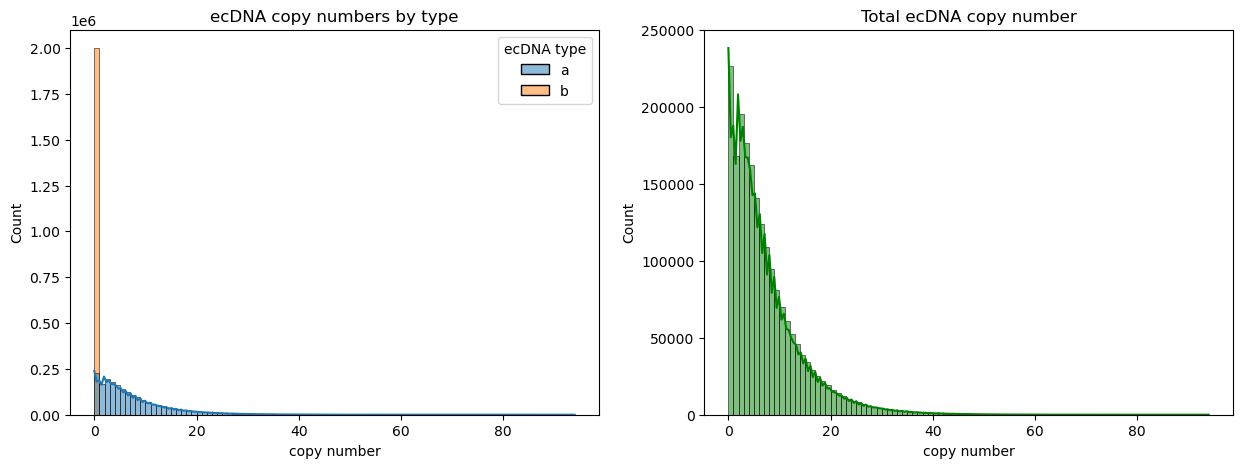

In [3]:
# plot histograms
max_no = int(max(data_a.max(), data_b.max()))
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data, bins=max_no, x="copy number", hue="ecDNA type", kde=True)
plt.title('ecDNA copy numbers by type')

# groupby simulation run and cell index and plot the histogram of total
# ecDNA copy number
group = data.groupby(['cell index','simulation run'])['copy number']
plt.subplot(122)
sns.histplot(group.sum(), bins=group.sum().max(), kde=True, color='g')
plt.title('Total ecDNA copy number')

In [4]:
# sanity check: this checks that no cells are devoid of both type 'a' and
# type 'b' ecDNA, i.e., that each cell contains either type of ecDNA

## cells with no copies of type 'a' ecDNA
a_0 = data.index[(data['copy number'] == 0) & (data['ecDNA type'] == 'a')].tolist()
## cells with no copies of type 'b' ecDNA
b_0 = data.index[(data['copy number'] == 0) & (data['ecDNA type'] == 'b')].tolist()

## check intersection between two sets is an empty set
if not list(set(a_0) & set(b_0)): print("Intersection is empty!")

Intersection is empty!


In [5]:
data_fracs = np.loadtxt(DIR+'cellFractions_3_1_0.txt', dtype=float)
data_fracs

array([[0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 2.00000e+00, 5.00000e-01, 0.00000e+00, 5.00000e-01],
       [0.00000e+00, 3.00000e+00, 3.33333e-01, 0.00000e+00, 6.66667e-01],
       ...,
       [1.90000e+01, 9.99980e+04, 8.98998e-01, 0.00000e+00, 1.01002e-01],
       [1.90000e+01, 9.99990e+04, 8.98999e-01, 0.00000e+00, 1.01001e-01],
       [1.90000e+01, 1.00000e+05, 8.98990e-01, 0.00000e+00, 1.01010e-01]])

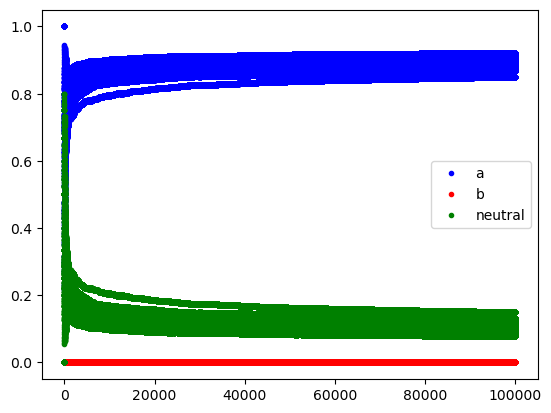

In [6]:
# plot cell fractions as a function of total cell population
plt.figure()
plt.plot(data_fracs[:,1], data_fracs[:,2], 'b.', label='a')
plt.plot(data_fracs[:,1], data_fracs[:,3], 'r.', label='b')
plt.plot(data_fracs[:,1], data_fracs[:,4], 'g.', label='neutral')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

### Neutral cell population dynamics ($s=1$)

In [5]:
# load data from files
DIR = '../exps/'

data_a = np.loadtxt(DIR+'Summary_1_25_25_a.txt', dtype=int)
data_b = np.loadtxt(DIR+'Summary_1_25_25_b.txt', dtype=int)

# create pandas dataframe... this part is a hack that might get removed
# if I already save output from the C++ code in the correct format

## create vector that contains the simulation run index
simulation_run = np.repeat(np.arange(0,data_a.shape[0],1),
          data_a.shape[1])

## create vector containing cell number
cell_index = np.tile(np.arange(0, data_a.shape[1],1), data_a.shape[0])

## create vector containing type name
types = np.repeat(np.array(['a', 'b']), data_a.flatten().size)

## create dataframe
data_n = pd.DataFrame({"cell index": np.concatenate((cell_index, cell_index)),
                    "simulation run": np.concatenate((simulation_run, simulation_run)),
                     "copy number": np.concatenate((data_a.flatten(), data_b.flatten())),
                     "ecDNA type": types})
data_n

FileNotFoundError: ../exps/Summary_1_25_25_a.txt not found.

Text(0.5, 1.0, 'Total ecDNA copy number')

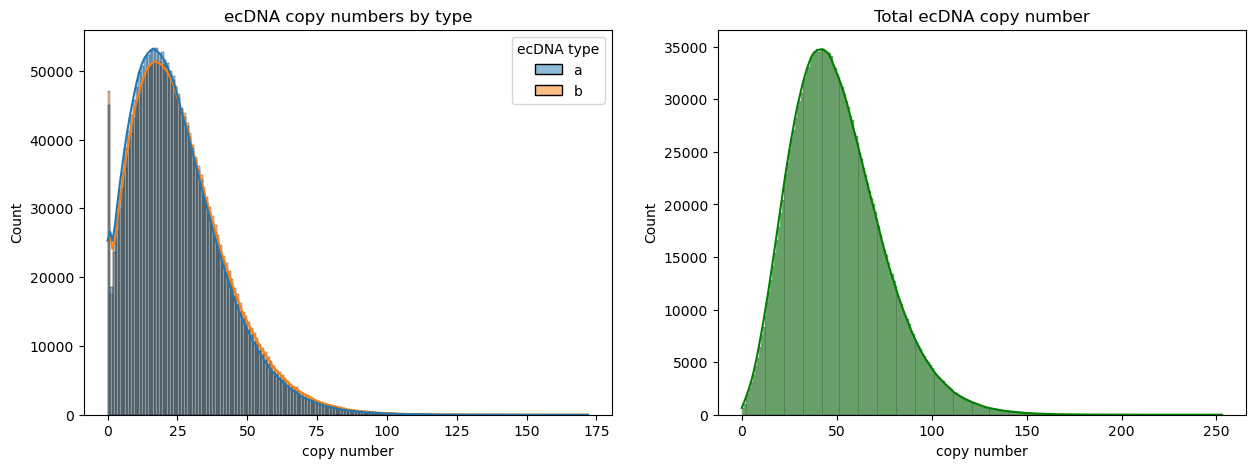

In [8]:
# plot histograms
max_no = int(max(data_a.max(), data_b.max()))
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data_n, bins=max_no, x="copy number", hue="ecDNA type", kde=True)
plt.title('ecDNA copy numbers by type')

# groupby simulation run and cell index and plot the histogram of total
# ecDNA copy number
group_n = data_n.groupby(['cell index','simulation run'])['copy number']
plt.subplot(122)
sns.histplot(group_n.sum(), bins=group_n.sum().max(), kde=True, color='g')
plt.title('Total ecDNA copy number')

In [9]:
# sanity check: this checks that no cells are devoid of both type 'a' and
# type 'b' ecDNA, i.e., that each cell contains either type of ecDNA

## cells with no copies of type 'a' ecDNA
a_0 = data_n.index[(data_n['copy number'] == 0) & (data_n['ecDNA type'] == 'a')].tolist()
## cells with no copies of type 'b' ecDNA
b_0 = data_n.index[(data_n['copy number'] == 0) & (data_n['ecDNA type'] == 'b')].tolist()

## check intersection between two sets is an empty set
if not list(set(a_0) & set(b_0)): print("Intersection is empty!")

Intersection is empty!


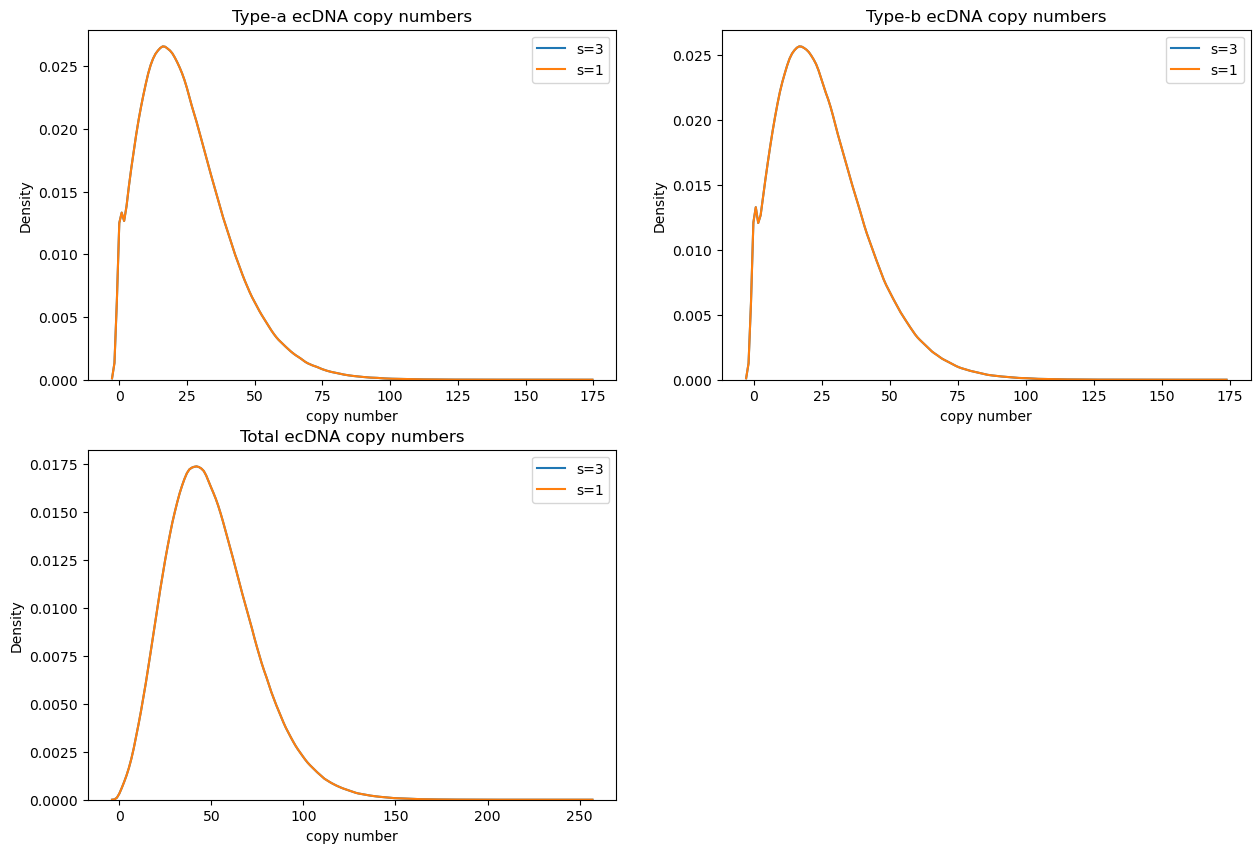

In [10]:
# plot overlapping histograms

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Type-a ecDNA copy numbers')
sns.kdeplot(data=data.loc[data['ecDNA type']=='a'], x="copy number",
             # bins=max_no, kde=False,
            label='s=3')
sns.kdeplot(data=data_n.loc[data_n['ecDNA type']=='a'], x="copy number",
             # bins=max_no, kde=False,
            label='s=1')
plt.legend()

plt.subplot(222)
plt.title('Type-b ecDNA copy numbers')
sns.kdeplot(data=data.loc[data['ecDNA type']=='b'], x="copy number",
             # bins=max_no, kde=False,
            label='s=3')
sns.kdeplot(data=data_n.loc[data_n['ecDNA type']=='b'], x="copy number",
             # bins=max_no, kde=False,
             label='s=1')
plt.legend()

plt.subplot(223)
plt.title('Total ecDNA copy numbers')
sns.kdeplot(group.sum(), label='s=3')
sns.kdeplot(group_n.sum(), label='s=1')
plt.legend()
plt.show()